In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


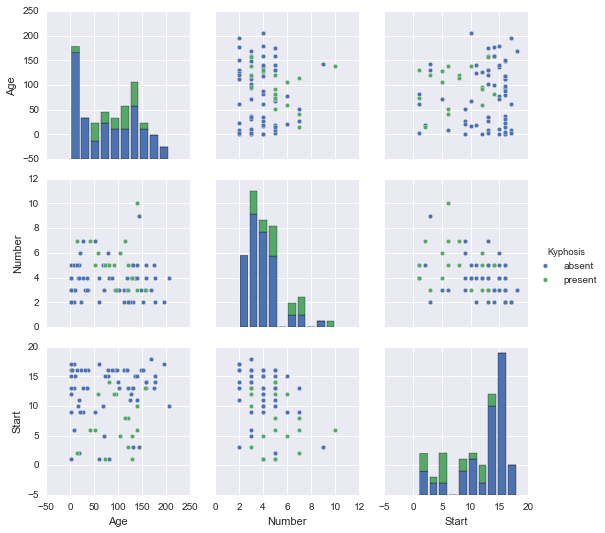

In [6]:
sns.pairplot(df,hue='Kyphosis')

In [7]:
from sklearn.cross_validation import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[21  0]
 [ 1  3]]


             precision    recall  f1-score   support

     absent       0.95      1.00      0.98        21
    present       1.00      0.75      0.86         4

avg / total       0.96      0.96      0.96        25



In [22]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=100)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[20  1]
 [ 2  2]]


             precision    recall  f1-score   support

     absent       0.91      0.95      0.93        21
    present       0.67      0.50      0.57         4

avg / total       0.87      0.88      0.87        25



In [32]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64